In [ ]:
#Gas Turbine NOx and CO Predictor: Alexander Jenouri - RIN: 661959489

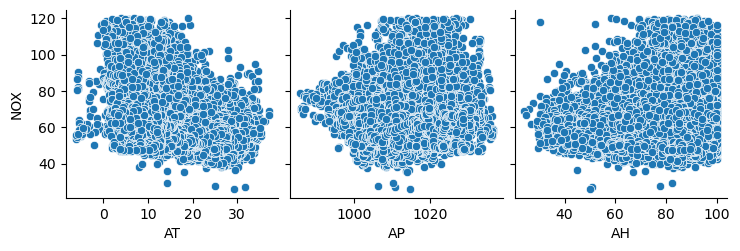

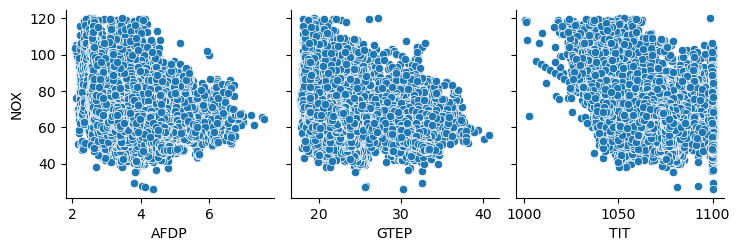

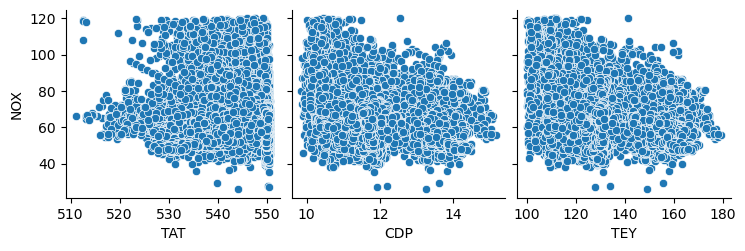

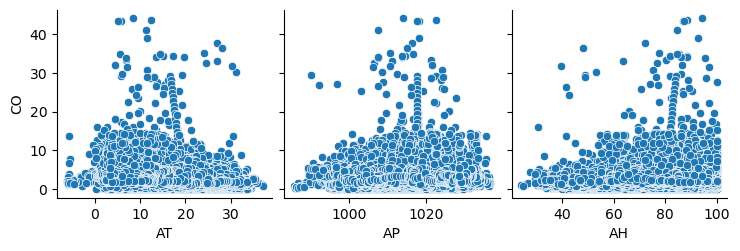

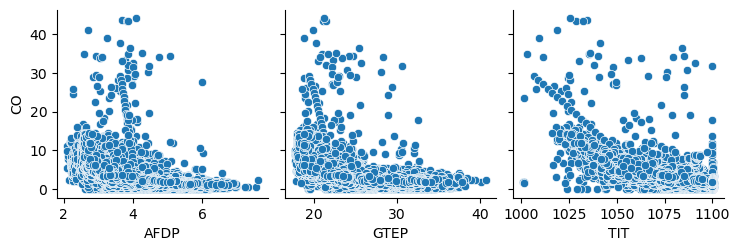

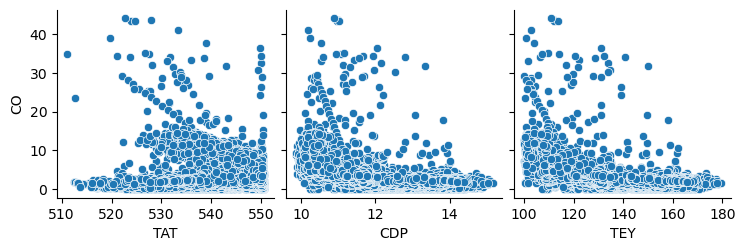

C:\Users\jenoua\AppData\Local\Temp\ipykernel_3228\1827078823.py:28: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1).set_properties(**{'max-width': '80px', 'font-size': '10pt'}).set_precision(2)


,Number,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
Number,1.00,0.06,0.04,-0.18,-0.26,0.03,-0.13,0.14,-0.05,-0.04,0.18,-0.33
AT,0.06,1.00,-0.41,-0.48,0.25,0.05,0.18,0.28,-0.09,0.02,-0.17,-0.56
AP,0.04,-0.41,1.00,-0.02,-0.04,0.06,-0.01,-0.23,0.12,0.10,0.07,0.19
AH,-0.18,-0.48,-0.02,1.00,-0.15,-0.24,-0.22,0.02,-0.14,-0.20,0.11,0.16
AFDP,-0.26,0.25,-0.04,-0.15,1.00,0.68,0.69,-0.47,0.67,0.70,-0.45,-0.19
GTEP,0.03,0.05,0.06,-0.24,0.68,1.00,0.87,-0.70,0.96,0.98,-0.52,-0.20
TIT,-0.13,0.18,-0.01,-0.22,0.69,0.87,1.00,-0.38,0.91,0.91,-0.71,-0.21
TAT,0.14,0.28,-0.23,0.02,-0.47,-0.70,-0.38,1.00,-0.68,-0.71,0.06,-0.09
TEY,-0.05,-0.09,0.12,-0.14,0.67,0.96,0.91,-0.68,1.00,0.99,-0.57,-0.12
CDP,-0.04,0.02,0.10,-0.20,0.70,0.98,0.91,-0.71,0.99,1.00,-0.55,-0.17


In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#Import Data
data = pd.read_csv(r'gt_full.csv', dtype=float)

#Visualize Features against Targets
sns.pairplot(data, x_vars=["AT","AP","AH"], y_vars=["NOX"])
sns.pairplot(data, x_vars=["AFDP","GTEP","TIT"], y_vars=["NOX"])
sns.pairplot(data, x_vars=["TAT","CDP","TEY"], y_vars=["NOX"])

sns.pairplot(data, x_vars=["AT","AP","AH"], y_vars=["CO"])
sns.pairplot(data, x_vars=["AFDP","GTEP","TIT"], y_vars=["CO"])
sns.pairplot(data, x_vars=["TAT","CDP","TEY"], y_vars=["CO"])

plt.show()

#Visualize Correlations within Data
#[ correlation heatmap code copied from StackOverflow ]
cmap = sns.diverging_palette(5, 250, as_cmap=True)
corr = data.corr()
corr.style.background_gradient(cmap, axis=1).set_properties(**{'max-width': '80px', 'font-size': '10pt'}).set_precision(2)

In [117]:
#Separate Data into Train and Test
df_features_orig = data.copy().drop("CO", axis=1).drop("NOX", axis=1).drop("Number", axis=1)
df_features = Normalizer().fit_transform(df_features_orig)
df_target = data[["NOX", "CO"]]

X_train, X_test, y_train, y_test=train_test_split(
    df_features,df_target,
    test_size=0.30,
    train_size=0.70,
    shuffle=True)

NOx - Linear Model: MAE = 5.873
NOx - Linear Model: R2 = 0.52
CO - Linear Model: MAE = 0.854
CO - Linear Model: R2 = 0.554


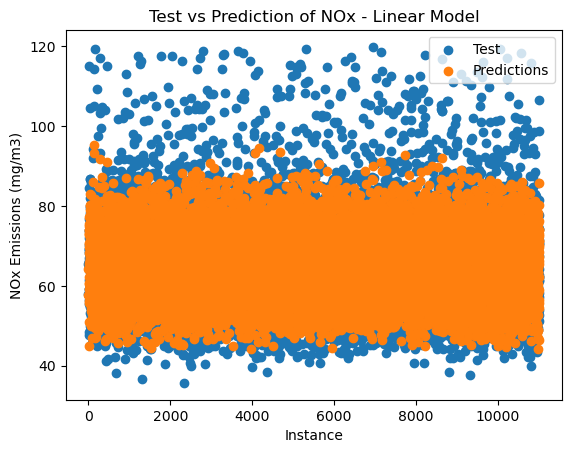

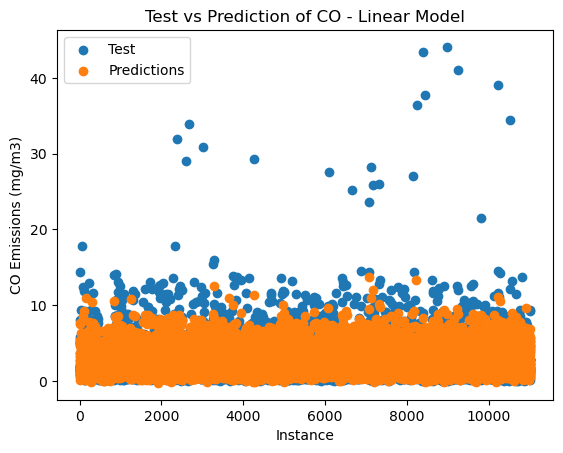

In [118]:
#Linear Regression Model - NOx
linear_model = LinearRegression()
linear_model.fit(X_train, y_train["NOX"])
nox_linear_pred = linear_model.predict(X_test)

nox_linear_mae = mean_absolute_error(y_test["NOX"], nox_linear_pred)
nox_linear_r2 = linear_model.score(X_train, y_train["NOX"])
print("NOx - Linear Model: MAE =", round (nox_linear_mae, 3))
print("NOx - Linear Model: R2 =", round (nox_linear_r2, 3))

#Linear Regression Model - CO
linear_model.fit(X_train, y_train["CO"])
co_linear_pred = linear_model.predict(X_test)

co_linear_mae = mean_absolute_error(y_test["CO"], co_linear_pred)
co_linear_r2 = linear_model.score(X_train, y_train["CO"])
print("CO - Linear Model: MAE =", round (co_linear_mae, 3))
print("CO - Linear Model: R2 =", round (co_linear_r2, 3))

#Visualize Linear Predictions
x = np.linspace(0,X_test.shape[0],X_test.shape[0])
plt.scatter(x,y_test["NOX"])
plt.scatter(x,nox_linear_pred)
plt.title("Test vs Prediction of NOx - Linear Model")
plt.xlabel("Instance")
plt.ylabel("NOx Emissions (mg/m3)")
plt.legend(["Test","Predictions"])
plt.show()

plt.scatter(x,y_test["CO"])
plt.scatter(x,co_linear_pred)
plt.title("Test vs Prediction of CO - Linear Model")
plt.xlabel("Instance")
plt.ylabel("CO Emissions (mg/m3)")
plt.legend(["Test","Predictions"])
plt.show()

NOx - RFR Model: MAE = 2.749
NOx - RFR Model: R2 = 0.98
CO - RFR Model: MAE = 0.517
CO - RFR Model: R2 = 0.967


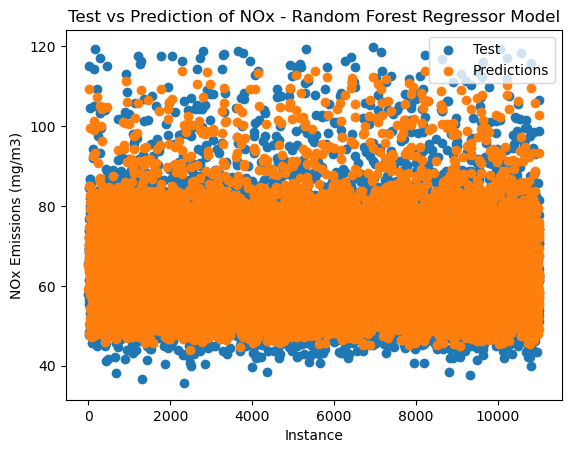

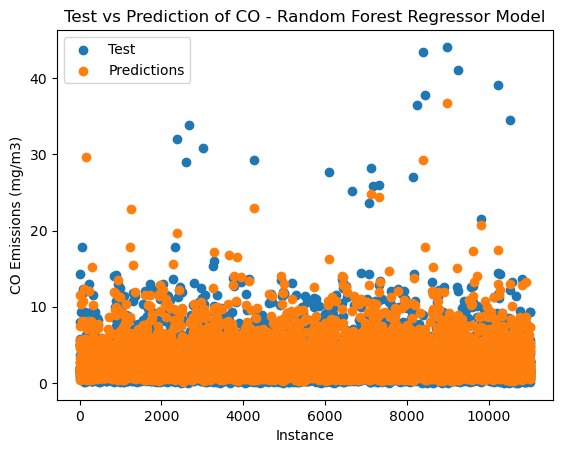

In [119]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor - NOx
RFR_model = RandomForestRegressor()
nox_RFR_model = RFR_model.fit(X_train, y_train["NOX"])
nox_RFR_pred = nox_RFR_model.predict(X_test)

nox_RFR_mae = mean_absolute_error(y_test["NOX"], nox_RFR_pred)
nox_RFR_r2 = nox_RFR_model.score(X_train, y_train["NOX"])
print("NOx - RFR Model: MAE =", round (nox_RFR_mae, 3))
print("NOx - RFR Model: R2 =", round (nox_RFR_r2, 3))

#Random Forest Regressor - CO
co_RFR_model = RFR_model.fit(X_train, y_train["CO"])
co_RFR_pred = co_RFR_model.predict(X_test)

co_RFR_mae = mean_absolute_error(y_test["CO"], co_RFR_pred)
co_RFR_r2 = co_RFR_model.score(X_train, y_train["CO"])
print("CO - RFR Model: MAE =", round (co_RFR_mae, 3))
print("CO - RFR Model: R2 =", round (co_RFR_r2, 3))

#Visualize RFR Predictions
plt.scatter(x,y_test["NOX"])
plt.scatter(x,nox_RFR_pred)
plt.title("Test vs Prediction of NOx - Random Forest Regressor Model")
plt.xlabel("Instance")
plt.ylabel("NOx Emissions (mg/m3)")
plt.legend(["Test","Predictions"])
plt.show()

plt.scatter(x,y_test["CO"])
plt.scatter(x,co_RFR_pred)
plt.title("Test vs Prediction of CO - Random Forest Regressor Model")
plt.xlabel("Instance")
plt.ylabel("CO Emissions (mg/m3)")
plt.legend(["Test","Predictions"])
plt.show()

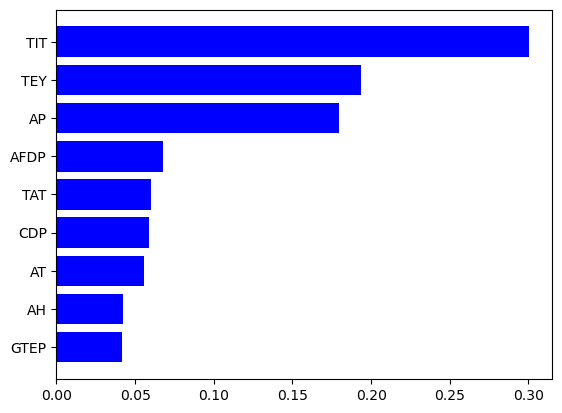

In [120]:
#Random Forest Feature Importance for CO

import numpy as np
def plot_feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = df_features_orig.columns
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.show()
    
plot_feature_importance(co_RFR_model)

CO - RFR Model: MAE = 0.978
CO - RFR Model: R2 = 0.883


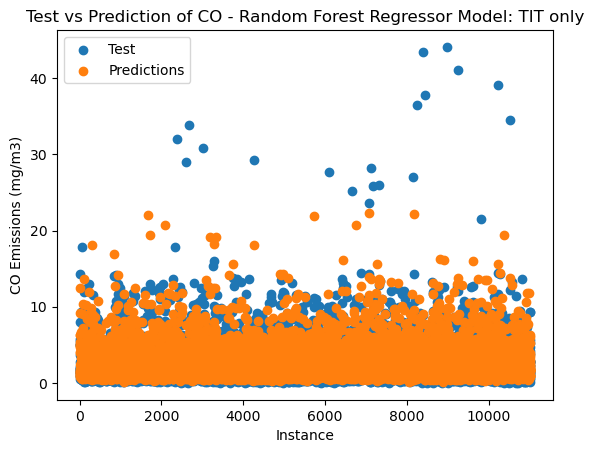

In [121]:
#Random Forest Regression for CO : TIT only
co_TIT_RFR_model = RFR_model.fit(X_train[:,5].reshape(-1,1), y_train["CO"])
co_TIT_RFR_pred = co_TIT_RFR_model.predict(X_test[:,5].reshape(-1,1))

co_TIT_RFR_mae = mean_absolute_error(y_test["CO"], co_TIT_RFR_pred)
co_TIT_RFR_r2 = co_TIT_RFR_model.score(X_train[:,5].reshape(-1,1), y_train["CO"])
print("CO - RFR Model: MAE =", round (co_TIT_RFR_mae, 3))
print("CO - RFR Model: R2 =", round (co_TIT_RFR_r2, 3))

#Visualize RFR: TIT only Predictions
plt.scatter(x,y_test["CO"])
plt.scatter(x,co_TIT_RFR_pred)
plt.title("Test vs Prediction of CO - Random Forest Regressor Model: TIT only")
plt.xlabel("Instance")
plt.ylabel("CO Emissions (mg/m3)")
plt.legend(["Test","Predictions"])
plt.show()

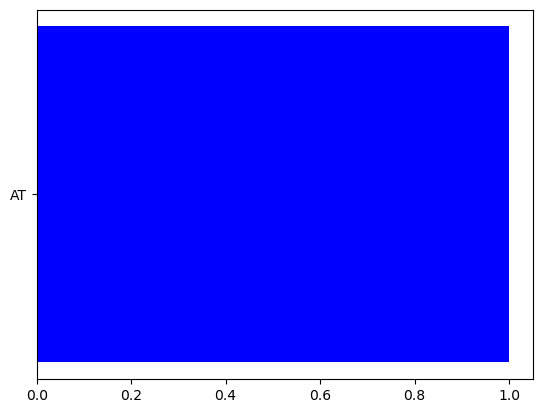

In [122]:
#Random Forest Feature Importance for NOx

plot_feature_importance(nox_RFR_model)

NOX - RFR Model: MAE = 62.921
NOX - RFR Model: R2 = 0.813


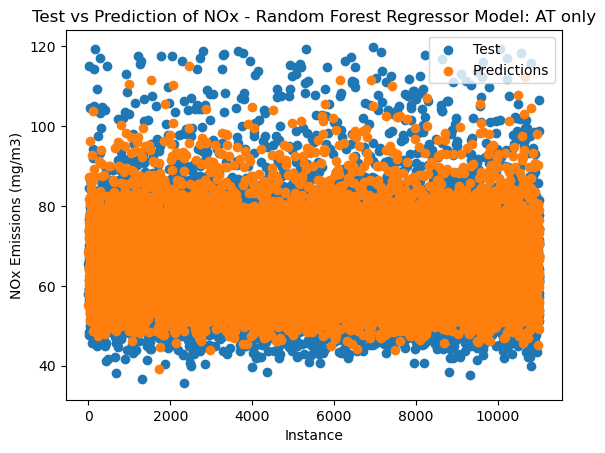

In [123]:
#Random Forest Regression for NOx : AT only

nox_AT_RFR_model = RFR_model.fit(X_train[:,0].reshape(-1,1), y_train["NOX"])
nox_AT_RFR_pred = nox_AT_RFR_model.predict(X_test[:,0].reshape(-1,1))

nox_AT_RFR_mae = mean_absolute_error(y_test["NOX"], co_TIT_RFR_pred)
nox_AT_RFR_r2 = nox_AT_RFR_model.score(X_train[:,0].reshape(-1,1), y_train["NOX"])
print("NOX - RFR Model: MAE =", round (nox_AT_RFR_mae, 3))
print("NOX - RFR Model: R2 =", round (nox_AT_RFR_r2, 3))

#Visualize RFR: AT only Predictions
plt.scatter(x,y_test["NOX"])
plt.scatter(x,nox_AT_RFR_pred)
plt.title("Test vs Prediction of NOx - Random Forest Regressor Model: AT only")
plt.xlabel("Instance")
plt.ylabel("NOx Emissions (mg/m3)")
plt.legend(["Test","Predictions"])
plt.show()